Epoch 0, Loss: 0.5248563289642334, Test Loss: 0.494406521320343
Epoch 10, Loss: 0.31261980533599854, Test Loss: 0.274897038936615
Epoch 20, Loss: 0.039197977632284164, Test Loss: 0.02661573700606823
Epoch 30, Loss: 0.05554170534014702, Test Loss: 0.05316833406686783
Epoch 40, Loss: 0.028150811791419983, Test Loss: 0.027453428134322166
Epoch 50, Loss: 0.025568900629878044, Test Loss: 0.023835014551877975
Epoch 60, Loss: 0.025600703433156013, Test Loss: 0.026244493201375008
Epoch 70, Loss: 0.02423909306526184, Test Loss: 0.023690147325396538
Epoch 80, Loss: 0.0241396427154541, Test Loss: 0.02380417101085186
Epoch 90, Loss: 0.024166012182831764, Test Loss: 0.02410220541059971


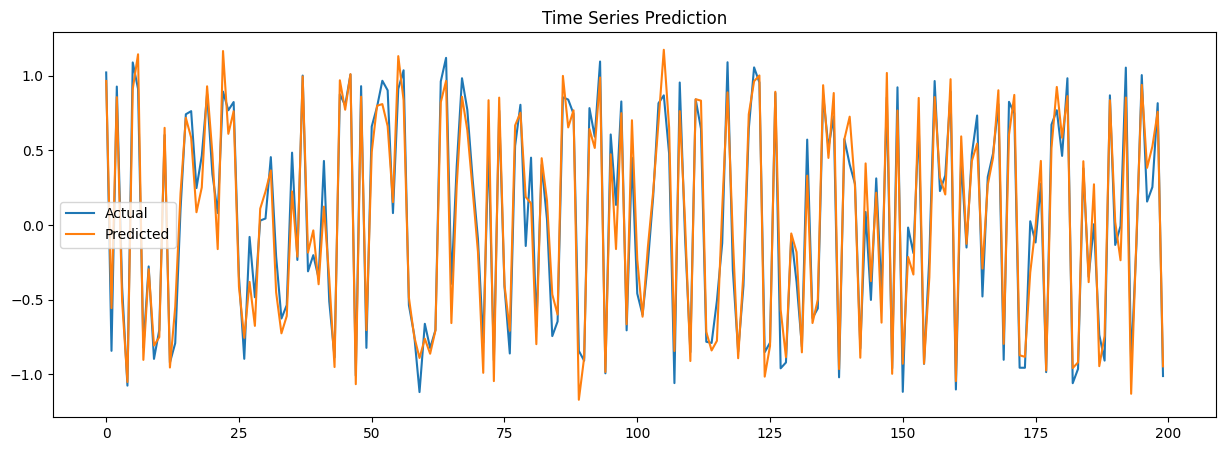

Mean Squared Error: 0.023759139964949737


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate a synthetic time series dataset
np.random.seed(0)
time = np.arange(0, 100, 0.1)
amplitude = np.sin(time) + np.random.normal(0, 0.1, len(time))
X = amplitude[:-1]
y = amplitude[1:]

# Reshape data for the model
X = X.reshape(-1, 1, 1)
y = y.reshape(-1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define an LSTM with Attention mechanism
class LSTMAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1, num_layers=1):
        super(LSTMAttention, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.attention = nn.Linear(hidden_dim, 1)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        attention_weights = torch.softmax(self.attention(lstm_out).squeeze(-1), dim=-1)
        context_vector = torch.sum(lstm_out * attention_weights.unsqueeze(-1), dim=1)
        out = self.fc(context_vector)
        return out

# Instantiate the model
model = LSTMAttention(input_dim=1, hidden_dim=50)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training the model
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        model.eval()
        test_pred = model(X_test_tensor)
        test_loss = criterion(test_pred, y_test_tensor)
        print(f'Epoch {epoch}, Loss: {loss.item()}, Test Loss: {test_loss.item()}')

# Predictions
model.eval()
predictions = model(X_test_tensor).detach().numpy()

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Time Series Prediction')
plt.legend()
plt.show()

# Metrics
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Interpretation
# The plot shows how well the LSTM model with attention mechanism can predict the future values of a time series.
# The MSE provides a quantitative measure of the model's prediction accuracy.

[*********************100%%**********************]  1 of 1 completed


Epoch 0, Loss: 0.49225592613220215, Test Loss: 0.4385894238948822
Epoch 10, Loss: 0.04126078262925148, Test Loss: 0.040198054164648056
Epoch 20, Loss: 0.04287533462047577, Test Loss: 0.04100143909454346
Epoch 30, Loss: 0.039400868117809296, Test Loss: 0.042070407420396805
Epoch 40, Loss: 0.026365987956523895, Test Loss: 0.030158964917063713
Epoch 50, Loss: 0.018894556909799576, Test Loss: 0.021875988692045212
Epoch 60, Loss: 0.01315530389547348, Test Loss: 0.014927384443581104
Epoch 70, Loss: 0.007764861453324556, Test Loss: 0.008767982013523579
Epoch 80, Loss: 0.003325092140585184, Test Loss: 0.003711036406457424
Epoch 90, Loss: 0.0009187805117107928, Test Loss: 0.0010641003027558327


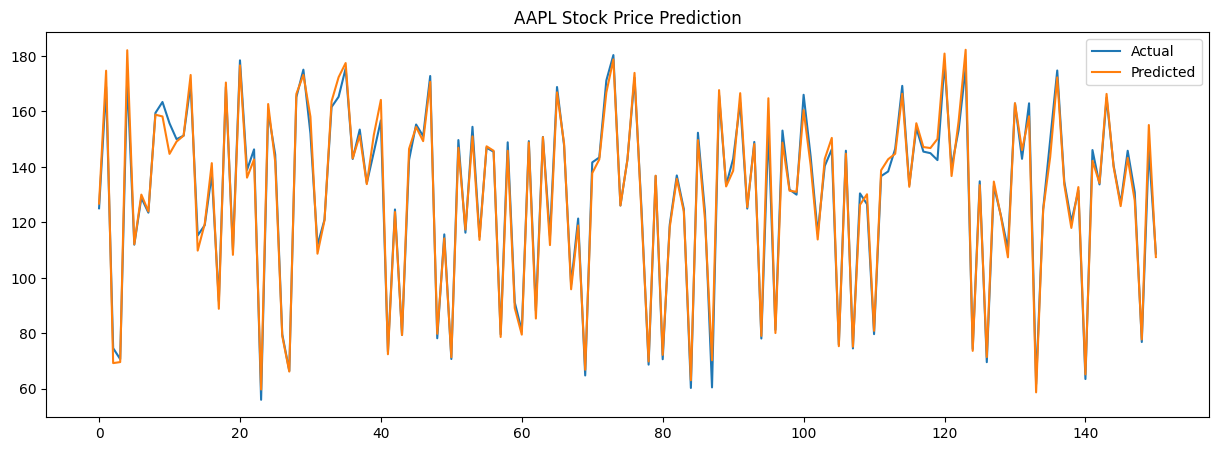

Mean Squared Error: 10.552608503186798


In [ ]:
# Import necessary libraries
import yfinance as yf
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Download Apple Inc. stock data
aapl_data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

# Use the 'Close' price for prediction
close_prices = aapl_data['Close'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices.reshape(-1, 1))

# Prepare the dataset
X = close_prices_scaled[:-1]
y = close_prices_scaled[1:]

# Reshape for LSTM
X = X.reshape(-1, 1, 1)
y = y.reshape(-1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# LSTM with Attention Mechanism
class LSTMAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1, num_layers=1):
        super(LSTMAttention, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.attention = nn.Linear(hidden_dim, 1)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        attention_weights = torch.softmax(self.attention(lstm_out).squeeze(-1), dim=-1)
        context_vector = torch.sum(lstm_out * attention_weights.unsqueeze(-1), dim=1)
        out = self.fc(context_vector)
        return out

# Instantiate and train the model
model = LSTMAttention(input_dim=1, hidden_dim=50)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        model.eval()
        test_pred = model(X_test_tensor)
        test_loss = criterion(test_pred, y_test_tensor)
        print(f'Epoch {epoch}, Loss: {loss.item()}, Test Loss: {test_loss.item()}')

# Predictions
model.eval()
predictions = model(X_test_tensor).detach().numpy()
predictions_actual = scaler.inverse_transform(predictions)

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(scaler.inverse_transform(y_test), label='Actual')
plt.plot(predictions_actual, label='Predicted')
plt.title('AAPL Stock Price Prediction')
plt.legend()
plt.show()

# Calculate MSE
mse = mean_squared_error(scaler.inverse_transform(y_test), predictions_actual)
print(f'Mean Squared Error: {mse}')


[*********************100%%**********************]  1 of 1 completed


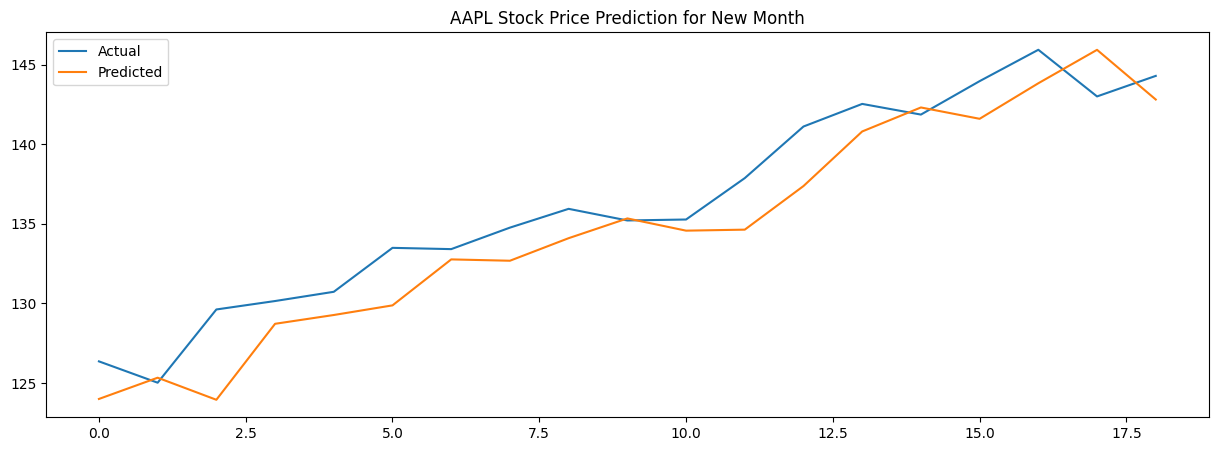

New Mean Squared Error: 5.901770508584664


In [ ]:
# Step 1: Fetch additional data for the next month
additional_data = yf.download('AAPL', start='2023-01-01', end='2023-02-01')

# Step 2: Preprocess the new data
new_close_prices = additional_data['Close'].values
new_close_prices_scaled = scaler.transform(new_close_prices.reshape(-1, 1))

# Preparing the new dataset for prediction
X_new = new_close_prices_scaled[:-1]
y_new_actual = new_close_prices_scaled[1:]

X_new = X_new.reshape(-1, 1, 1)
y_new_actual = y_new_actual.reshape(-1, 1)

# Convert to PyTorch tensors
X_new_tensor = torch.tensor(X_new, dtype=torch.float32)
y_new_actual_tensor = torch.tensor(y_new_actual, dtype=torch.float32)

# Step 3: Make predictions
model.eval()
new_predictions = model(X_new_tensor).detach().numpy()
new_predictions_actual = scaler.inverse_transform(new_predictions)

# Step 4: Evaluate the Model
plt.figure(figsize=(15, 5))
plt.plot(scaler.inverse_transform(y_new_actual), label='Actual')
plt.plot(new_predictions_actual, label='Predicted')
plt.title('AAPL Stock Price Prediction for New Month')
plt.legend()
plt.show()

# Calculate metrics
new_mse = mean_squared_error(scaler.inverse_transform(y_new_actual), new_predictions_actual)
print(f'New Mean Squared Error: {new_mse}')


[*********************100%%**********************]  1 of 1 completed


Epoch 0, Loss: 0.29863840341567993, Test Loss: 0.22745752334594727
Epoch 10, Loss: 0.04558089002966881, Test Loss: 0.06670282781124115
Epoch 20, Loss: 0.03361284360289574, Test Loss: 0.03603930398821831
Epoch 30, Loss: 0.0287657231092453, Test Loss: 0.02945750020444393
Epoch 40, Loss: 0.022210722789168358, Test Loss: 0.023749934509396553
Epoch 50, Loss: 0.013928511179983616, Test Loss: 0.013844304718077183
Epoch 60, Loss: 0.0053092362359166145, Test Loss: 0.0051330504938960075
Epoch 70, Loss: 0.0008464830461889505, Test Loss: 0.0007866177475079894
Epoch 80, Loss: 0.0007955168257467449, Test Loss: 0.0008044677670113742
Epoch 90, Loss: 0.0006285746931098402, Test Loss: 0.0005768018891103566


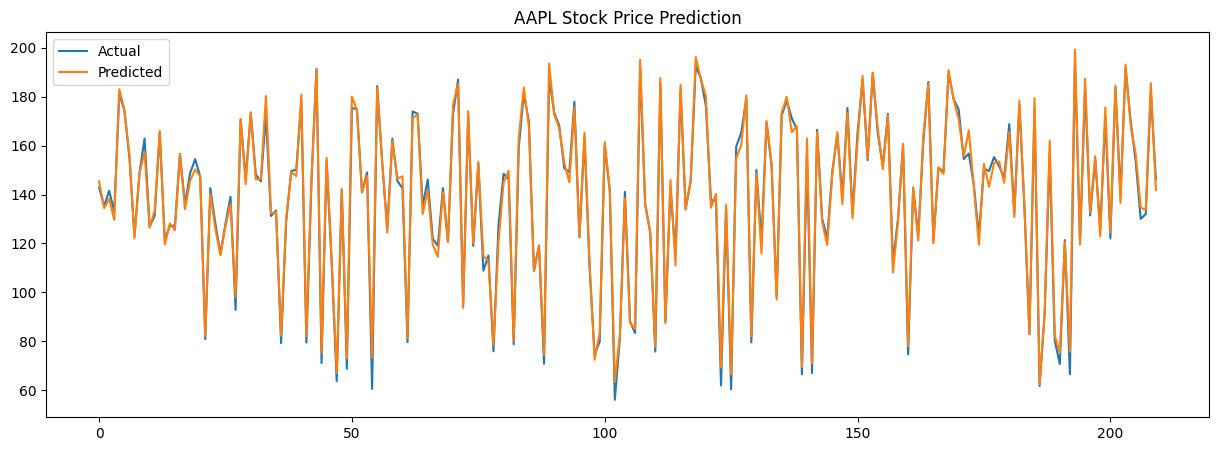

Mean Squared Error: 9.216320015268314


In [ ]:
# Import necessary libraries
import yfinance as yf
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Download Apple Inc. stock data
aapl_data = yf.download('AAPL', start='2020-01-01', end='2024-03-01')

# Use the 'Close' price for prediction
close_prices = aapl_data['Close'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices.reshape(-1, 1))

# Prepare the dataset
X = close_prices_scaled[:-1]
y = close_prices_scaled[1:]

# Reshape for LSTM
X = X.reshape(-1, 1, 1)
y = y.reshape(-1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# LSTM with Attention Mechanism
class LSTMAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1, num_layers=1):
        super(LSTMAttention, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.attention = nn.Linear(hidden_dim, 1)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        attention_weights = torch.softmax(self.attention(lstm_out).squeeze(-1), dim=-1)
        context_vector = torch.sum(lstm_out * attention_weights.unsqueeze(-1), dim=1)
        out = self.fc(context_vector)
        return out

# Instantiate and train the model
model = LSTMAttention(input_dim=1, hidden_dim=50)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        model.eval()
        test_pred = model(X_test_tensor)
        test_loss = criterion(test_pred, y_test_tensor)
        print(f'Epoch {epoch}, Loss: {loss.item()}, Test Loss: {test_loss.item()}')

# Predictions
model.eval()
predictions = model(X_test_tensor).detach().numpy()
predictions_actual = scaler.inverse_transform(predictions)

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(scaler.inverse_transform(y_test), label='Actual')
plt.plot(predictions_actual, label='Predicted')
plt.title('AAPL Stock Price Prediction')
plt.legend()
plt.show()

# Calculate MSE
mse = mean_squared_error(scaler.inverse_transform(y_test), predictions_actual)
print(f'Mean Squared Error: {mse}')

[*********************100%%**********************]  1 of 1 completed


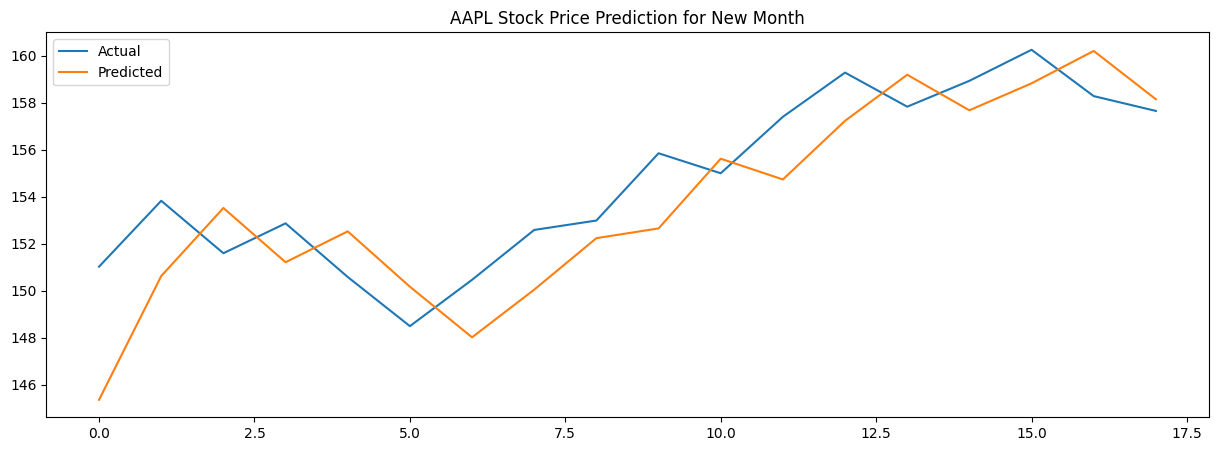

New Mean Squared Error: 5.530515659885067


In [ ]:
# Step 1: Fetch additional data for the next month
additional_data = yf.download('AAPL', start='2023-03-02', end='2023-03-29')

# Step 2: Preprocess the new data
new_close_prices = additional_data['Close'].values
new_close_prices_scaled = scaler.transform(new_close_prices.reshape(-1, 1))

# Preparing the new dataset for prediction
X_new = new_close_prices_scaled[:-1]
y_new_actual = new_close_prices_scaled[1:]

X_new = X_new.reshape(-1, 1, 1)
y_new_actual = y_new_actual.reshape(-1, 1)

# Convert to PyTorch tensors
X_new_tensor = torch.tensor(X_new, dtype=torch.float32)
y_new_actual_tensor = torch.tensor(y_new_actual, dtype=torch.float32)

# Step 3: Make predictions
model.eval()
new_predictions = model(X_new_tensor).detach().numpy()
new_predictions_actual = scaler.inverse_transform(new_predictions)

# Step 4: Evaluate the Model
plt.figure(figsize=(15, 5))
plt.plot(scaler.inverse_transform(y_new_actual), label='Actual')
plt.plot(new_predictions_actual, label='Predicted')
plt.title('AAPL Stock Price Prediction for New Month')
plt.legend()
plt.show()

# Calculate metrics
new_mse = mean_squared_error(scaler.inverse_transform(y_new_actual), new_predictions_actual)
print(f'New Mean Squared Error: {new_mse}')

[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 182 entries, 2024-03-21 09:30:00 to 2024-04-01 15:45:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       182 non-null    float64
 1   High       182 non-null    float64
 2   Low        182 non-null    float64
 3   Close      182 non-null    float64
 4   Adj Close  182 non-null    float64
 5   Volume     182 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 10.0 KB
Epoch 0, Loss: 0.0657133013010025, Test Loss: 0.04026336595416069


Epoch 10, Loss: 0.0245974138379097, Test Loss: 0.01477576233446598
Epoch 20, Loss: 0.01692109927535057, Test Loss: 0.010812581516802311
Epoch 30, Loss: 0.00953697320073843, Test Loss: 0.007226507179439068
Epoch 40, Loss: 0.003733794204890728, Test Loss: 0.004765042103827
Epoch 50, Loss: 0.0036734396126121283, Test Loss: 0.004648056346923113
Epoch 60, Loss: 0.003245872911065817, Test Loss: 0.004530373960733414
Epoch 70, Loss: 0.003219934646040201, Test Loss: 0.004611228592693806
Epoch 80, Loss: 0.003156220307573676, Test Loss: 0.004580257460474968
Epoch 90, Loss: 0.0031277714297175407, Test Loss: 0.0045587532222270966


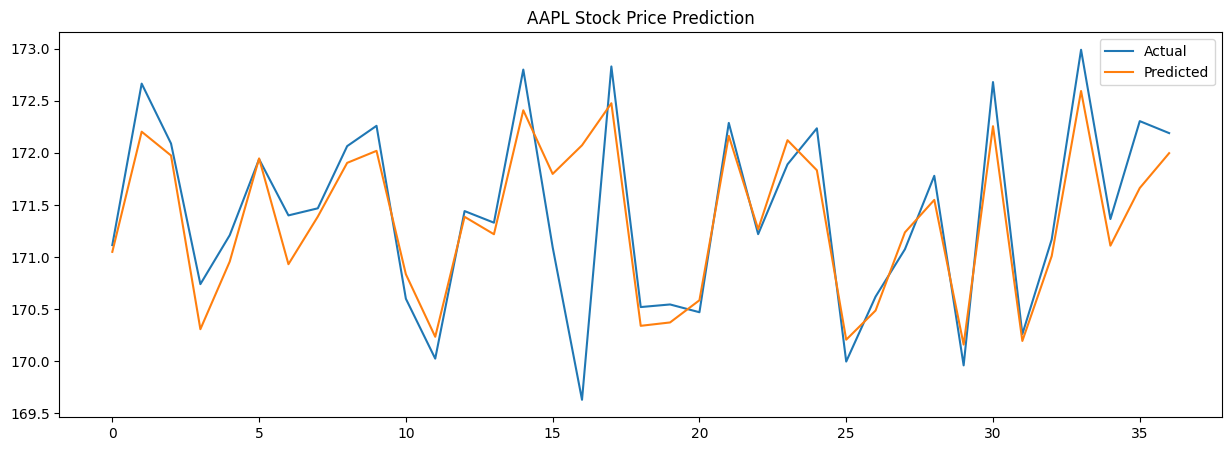

Mean Squared Error: 0.24371483494729004


In [ ]:
# Import necessary libraries
import yfinance as yf
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Download the last 7 days of Apple Inc. stock data in 10-minute intervals
aapl_data = yf.download('AAPL', period='7d', interval='15m')
aapl_data.info()
# Use the 'Close' price for prediction
close_prices = aapl_data['Close'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices.reshape(-1, 1))

# Prepare the dataset
X = close_prices_scaled[:-1]
y = close_prices_scaled[1:]

# Reshape for LSTM
X = X.reshape(-1, 1, 1)
y = y.reshape(-1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# LSTM with Attention Mechanism
# class LSTMAttention(nn.Module):
    # ... (no changes in the class definition)

# Instantiate and train the model
# ... (rest of the training code)

# Note that with such high-frequency data, model architecture and hyperparameters
# might need to be re-evaluated for optimal performance.
# LSTM with Attention Mechanism
class LSTMAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1, num_layers=1):
        super(LSTMAttention, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.attention = nn.Linear(hidden_dim, 1)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        attention_weights = torch.softmax(self.attention(lstm_out).squeeze(-1), dim=-1)
        context_vector = torch.sum(lstm_out * attention_weights.unsqueeze(-1), dim=1)
        out = self.fc(context_vector)
        return out

# Instantiate and train the model
model = LSTMAttention(input_dim=1, hidden_dim=50)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        model.eval()
        test_pred = model(X_test_tensor)
        test_loss = criterion(test_pred, y_test_tensor)
        print(f'Epoch {epoch}, Loss: {loss.item()}, Test Loss: {test_loss.item()}')

# Predictions
model.eval()
predictions = model(X_test_tensor).detach().numpy()
predictions_actual = scaler.inverse_transform(predictions)

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(scaler.inverse_transform(y_test), label='Actual')
plt.plot(predictions_actual, label='Predicted')
plt.title('AAPL Stock Price Prediction')
plt.legend()
plt.show()

# Calculate MSE
mse = mean_squared_error(scaler.inverse_transform(y_test), predictions_actual)
print(f'Mean Squared Error: {mse}')

In [ ]:
#

In [ ]:
# import quandl

# # Get data via Quandl API
# data = quandl.get('WIKI/AAPL')

# # Summarize
# print(data.info())



In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

def download_7d_stock_data(stock, interval, start_date, end_date):
    return yf.download(stock, start=start_date, end=end_date, interval=interval)

# Parameters
stock = 'AAPL'  # Stock symbol
interval = '15m'  # Interval for fetching data
duration_days = 60  # Duration in days, maximum of 60 days

# Ensure duration does not exceed 60 days
duration_days = min(duration_days, 60)

# Calculate the date range
end_date = datetime.now()
start_date = end_date - timedelta(days=duration_days)

# Initialize an empty DataFrame to store all records
df = pd.DataFrame()

# Loop over the duration in 7-day intervals within the last 60 days
while start_date < end_date:
    current_end_date = start_date + timedelta(days=7)
    if current_end_date > end_date:
        current_end_date = end_date

    stock_data = download_7d_stock_data(stock, interval, start_date, current_end_date)

    # Add the new data to the main DataFrame
    df = pd.concat([df, stock_data])

    # Print the data range and the cumulative number of records
    print(f"Data range: {start_date.date()} to {current_end_date.date()}")
    print(f"Total number of records in DataFrame: {len(df)}")

    # Update the start date for the next iteration
    start_date = current_end_date


[*********************100%%**********************]  1 of 1 completed

Data range: 2024-02-01 to 2024-02-08
Total number of records in DataFrame: 130



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Data range: 2024-02-08 to 2024-02-15
Total number of records in DataFrame: 260
Data range: 2024-02-15 to 2024-02-22
Total number of records in DataFrame: 364


[*********************100%%**********************]  1 of 1 completed


Data range: 2024-02-22 to 2024-02-29
Total number of records in DataFrame: 494


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Data range: 2024-02-29 to 2024-03-07
Total number of records in DataFrame: 624
Data range: 2024-03-07 to 2024-03-14
Total number of records in DataFrame: 754


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Data range: 2024-03-14 to 2024-03-21
Total number of records in DataFrame: 884
Data range: 2024-03-21 to 2024-03-28
Total number of records in DataFrame: 1014
Data range: 2024-03-28 to 2024-04-01
Total number of records in DataFrame: 1040


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1040 entries, 2024-02-02 09:30:00 to 2024-04-01 15:45:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1040 non-null   float64
 1   High       1040 non-null   float64
 2   Low        1040 non-null   float64
 3   Close      1040 non-null   float64
 4   Adj Close  1040 non-null   float64
 5   Volume     1040 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 56.9 KB


In [ ]:
df.sample(20)

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-02-22 13:00:00,183.610001,183.970093,183.535004,183.889999,183.889999,1424295
2024-03-20 15:15:00,178.009995,178.389999,178.000000,178.214996,178.214996,1897028
2024-03-21 15:45:00,170.940002,171.570007,170.914993,171.399994,171.399994,6681810
2024-02-06 11:30:00,188.820007,189.020004,188.660004,188.849701,188.849701,1283691
2024-02-27 14:15:00,181.554993,182.600006,181.389999,182.600006,182.600006,4268024
2024-03-28 12:15:00,171.029999,171.169998,170.729996,171.169205,171.169205,1143294
2024-02-06 10:30:00,187.910004,188.205002,187.570007,187.884995,187.884995,1670059
2024-02-23 09:45:00,184.160004,184.285004,183.750000,183.869995,183.869995,1882285
2024-02-26 11:00:00,181.235001,181.270004,180.865005,181.115005,181.115005,1767226


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1040 entries, 2024-02-02 09:30:00 to 2024-04-01 15:45:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1040 non-null   float64
 1   High       1040 non-null   float64
 2   Low        1040 non-null   float64
 3   Close      1040 non-null   float64
 4   Adj Close  1040 non-null   float64
 5   Volume     1040 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 56.9 KB


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1040 entries, 2024-02-02 09:30:00 to 2024-04-01 15:45:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1040 non-null   float64
 1   High       1040 non-null   float64
 2   Low        1040 non-null   float64
 3   Close      1040 non-null   float64
 4   Adj Close  1040 non-null   float64
 5   Volume     1040 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 56.9 KB
Epoch 0, Loss: 0.4190645217895508, Test Loss: 0.36669397354125977
Epoch 10, Loss: 0.06356119364500046, Test Loss: 0.05806634947657585
Epoch 20, Loss: 0.05671094357967377, Test Loss: 0.04965909570455551
Epoch 30, Loss: 0.04125601053237915, Test Loss: 0.03779676929116249
Epoch 40, Loss: 0.019850725308060646, Test Loss: 0.018267877399921417
Epoch 50, Loss: 0.005043708719313145, Test Loss: 0.004301607143133879
Epoch 60, Loss: 0.0011694333516061306, Test Loss: 0.001107986317947507
Epoch 

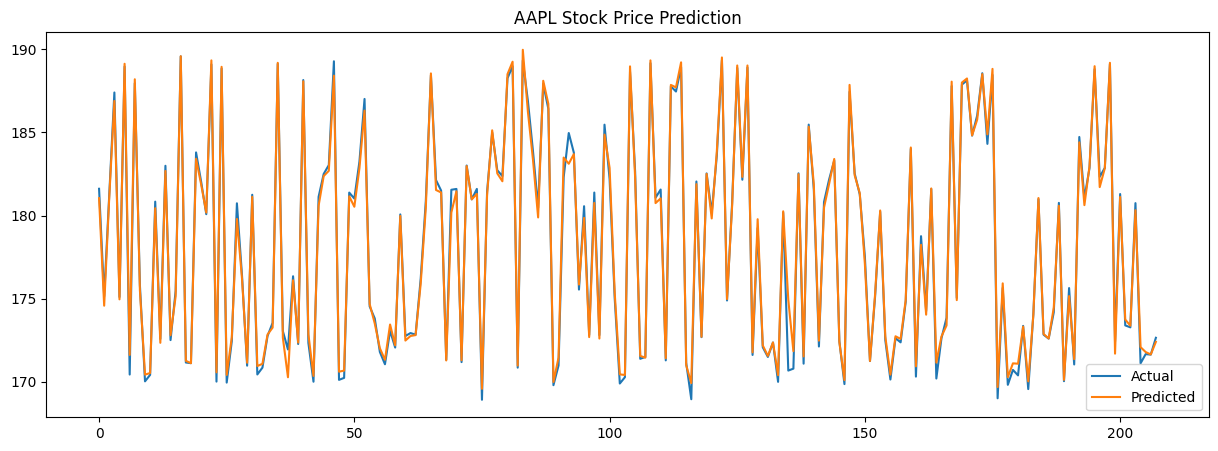

Mean Squared Error: 0.26299777861612844


In [ ]:
# Import necessary libraries
import yfinance as yf
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Download the last 7 days of Apple Inc. stock data in 10-minute intervals
aapl_data = df
aapl_data.info()
# Use the 'Close' price for prediction
close_prices = aapl_data['Close'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices.reshape(-1, 1))

# Prepare the dataset
X = close_prices_scaled[:-1]
y = close_prices_scaled[1:]

# Reshape for LSTM
X = X.reshape(-1, 1, 1)
y = y.reshape(-1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# LSTM with Attention Mechanism
# class LSTMAttention(nn.Module):
    # ... (no changes in the class definition)

# Instantiate and train the model
# ... (rest of the training code)

# Note that with such high-frequency data, model architecture and hyperparameters
# might need to be re-evaluated for optimal performance.
# LSTM with Attention Mechanism
class LSTMAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1, num_layers=1):
        super(LSTMAttention, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.attention = nn.Linear(hidden_dim, 1)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        attention_weights = torch.softmax(self.attention(lstm_out).squeeze(-1), dim=-1)
        context_vector = torch.sum(lstm_out * attention_weights.unsqueeze(-1), dim=1)
        out = self.fc(context_vector)
        return out

# Instantiate and train the model
model = LSTMAttention(input_dim=1, hidden_dim=50)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        model.eval()
        test_pred = model(X_test_tensor)
        test_loss = criterion(test_pred, y_test_tensor)
        print(f'Epoch {epoch}, Loss: {loss.item()}, Test Loss: {test_loss.item()}')

# Predictions
model.eval()
predictions = model(X_test_tensor).detach().numpy()
predictions_actual = scaler.inverse_transform(predictions)

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(scaler.inverse_transform(y_test), label='Actual')
plt.plot(predictions_actual, label='Predicted')
plt.title('AAPL Stock Price Prediction')
plt.legend()
plt.show()

# Calculate MSE
mse = mean_squared_error(scaler.inverse_transform(y_test), predictions_actual)
print(f'Mean Squared Error: {mse}')

In [ ]:
# Create the 'Movement' column
df['Movement'] = df.apply(lambda row: 'U' if row['Close'] > row['Open'] else 'D', axis=1)

# Define functions to get the last 4 and 8 movements
def get_last_n_movements(movements, n):
    return ''.join(movements[-n:]) if len(movements) >= n else 'NaN'

# Initialize the new columns
df['last_4'] = 'NaN'
df['last_8'] = 'NaN'

# Populate 'last_4' and 'last_8' columns
for i in range(len(df)):
    df.at[i, 'last_4'] = get_last_n_movements(df['Movement'].iloc[max(0, i-3):i+1], 4)
    df.at[i, 'last_8'] = get_last_n_movements(df['Movement'].iloc[max(0, i-7):i+1], 8)

# Display the updated DataFrame
df[['last_4', 'last_8']].sample(20)


,last_4,last_8
Datetime,,
2024-03-28 15:15:00,NaN,NaN
1023,DUUD,DUDDDUUD
102,UDUD,UDDUUDUD
2024-02-08 11:45:00,NaN,NaN
58,DDDU,DUDUDDDU
652,DUDD,DDDDDUDD
988,UUUD,UDUUUUUD
2024-02-20 15:45:00,NaN,NaN
881,UUUU,DDUDUUUU


In [ ]:
df.sample(10)

,Open,High,Low,Close,Adj Close,Volume,Movement,last_4,last_8
Datetime,,,,,,,,,
632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UUUD,UUUDUUUD
2024-03-18 12:30:00,175.255005,175.619995,175.104996,175.590607,175.590607,1323406.0,U,NaN,NaN
2024-02-23 15:45:00,182.574997,182.820007,182.229996,182.509995,182.509995,4046066.0,D,NaN,NaN
2024-03-27 11:45:00,172.460007,172.539993,172.050003,172.059998,172.059998,1026437.0,D,NaN,NaN
807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DDDU,DDUUDDDU
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DUDU,DDDDDUDU
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DDDU,DUDUDDDU
2024-02-16 11:15:00,183.248993,183.447296,183.089996,183.149994,183.149994,1270272.0,D,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UUDU,DUDDUUDU


In [ ]:
# Count occurrences in 'last_4' column
last_4_counts = df['last_4'].value_counts()

# Count occurrences in 'last_8' column
last_8_counts = df['last_8'].value_counts()

# Display the counts
print("Counts for 'last_4' patterns:\n", last_4_counts)
print("\nCounts for 'last_8' patterns:\n", last_8_counts)


Counts for 'last_4' patterns:
 NaN     1043
DUUU      71
UUUD      71
DDDD      69
DDUU      68
UDDD      68
DDDU      68
DUDD      66
UUDD      66
UDUD      64
UDDU      64
DDUD      64
DUDU      62
UUDU      62
UDUU      61
DUUD      57
UUUU      56
Name: last_4, dtype: int64

Counts for 'last_8' patterns:
 NaN         1047
DUUUDDUU      10
DDUDUUUD      10
UDUUUDDU      10
UUUDUDDD       9
            ... 
DUUUDUUU       1
UUDDDDUU       1
DUUDUDUU       1
UDUUDUDU       1
DDUDUUDU       1
Name: last_8, Length: 251, dtype: int64


In [ ]:
# Ensure the 'Movement' column is all strings
df['Movement'] = df.apply(lambda row: 'U' if row['Close'] > row['Open'] else ('D' if row['Close'] < row['Open'] else 'NaN'), axis=1)

def get_next_n_movements(movements, n):
    # Filter out NaN values and ensure the movements list is complete
    movements = [m for m in movements if m != 'NaN']
    return ''.join(movements[:n]) if len(movements) >= n else 'NaN'

# Initialize the new column
df['next_4'] = 'NaN'

# Populate 'next_4' column
for i in range(len(df) - 4):
    df.at[i, 'next_4'] = get_next_n_movements(df['Movement'].iloc[i+1:i+5], 4)

# Display the updated DataFrame
df[['last_4', 'next_4']].tail(20)


,last_4,next_4
Datetime,,
2056,NaN,NaN
2057,NaN,NaN
2058,NaN,NaN
2059,NaN,NaN
2060,NaN,NaN
2061,NaN,NaN
2062,NaN,NaN
2063,NaN,NaN
2064,NaN,NaN


In [ ]:
# Count occurrences in 'last_4' column
last_4_counts = df['last_4'].value_counts()

# Count occurences in 'next_4 column
next_4_counts = df['next_4'].value_counts()

# Count occurrences in 'last_8' column
last_8_counts = df['last_8'].value_counts()

# Display the counts
print("Counts for 'last_4' patterns:\n", last_4_counts)
print("\nCounts for 'next_4' patterns:\n", next_4_counts)
print("\nCounts for 'last_8' patterns:\n", last_8_counts)


Counts for 'last_4' patterns:
 NaN     1043
DUUU      71
UUUD      71
DDDD      69
DDUU      68
UDDD      68
DDDU      68
DUDD      66
UUDD      66
UDUD      64
UDDU      64
DDUD      64
DUDU      62
UUDU      62
UDUU      61
DUUD      57
UUUU      56
Name: last_4, dtype: int64

Counts for 'next_4' patterns:
 NaN     2100
DUUU      71
UUUD      71
DDDU      67
DDUU      67
UDDD      65
UUDD      65
DUDD      65
UDUD      63
DDUD      63
UDDU      63
UUDU      62
DUDU      61
UDUU      61
DDDD      60
UUUU      56
DUUD      56
Name: next_4, dtype: int64

Counts for 'last_8' patterns:
 NaN         1047
DUUUDDUU      10
DDUDUUUD      10
UDUUUDDU      10
UUUDUDDD       9
            ... 
DUUUDUUU       1
UUDDDDUU       1
DUUDUDUU       1
UDUUDUDU       1
DDUDUUDU       1
Name: last_8, Length: 251, dtype: int64


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Movement,last_4,last_8,next_4
Datetime,,,,,,,,,,
2024-02-02 09:30:00,180.449997,182.949997,180.050003,182.570007,182.570007,18450367.0,U,NaN,NaN,NaN
2024-02-02 09:45:00,182.570007,183.539902,182.009995,182.479996,182.479996,7370976.0,D,NaN,NaN,NaN
2024-02-02 10:00:00,182.501999,183.770004,182.440002,183.589996,183.589996,4402770.0,U,NaN,NaN,NaN
2024-02-02 10:15:00,183.580002,184.169998,183.289993,183.315002,183.315002,4872830.0,D,NaN,NaN,NaN
2024-02-02 10:30:00,183.330002,185.009995,183.160004,184.969894,184.969894,3673039.0,U,NaN,NaN,NaN


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the data
# df = pd.read_csv('/mnt/data/data.csv')

# Check for NaNs or infinite values in the data
if df.isnull().values.any():
    print('Data contains NaN values. These rows will be dropped.')
    df.dropna(inplace=True)

if np.isinf(df.values).any():
    print('Data contains infinite values. These will be replaced.')
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)

# Ensure all 'Movement' column data are strings, and encode 'next_4' as categorical labels
df['Movement'] = df['Movement'].astype(str)
pattern_to_label = {pattern: idx for idx, pattern in enumerate(df['next_4'].unique())}
df['next_4_label'] = df['next_4'].map(pattern_to_label)

# Select features and labels
features = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values
labels = df['next_4_label'].values

# Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)

# Reshape for LSTM with attention
X = features_scaled.reshape(features_scaled.shape[0], 1, features_scaled.shape[1])
y = labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# LSTM with Attention Mechanism for Classification
class LSTMAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=1):
        super(LSTMAttention, self).__init__()
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.attention = nn.Linear(hidden_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        attention_weights = F.softmax(self.attention(lstm_out).squeeze(1), dim=1)
        context_vector = torch.sum(lstm_out * attention_weights.unsqueeze(-1), dim=1)
        out = self.fc(context_vector)
        return out

# Instantiate the model
model = LSTMAttention(input_dim=6, hidden_dim=50, output_dim=len(pattern_to_label))

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    if not torch.isfinite(loss):
        print(f"Stop training at epoch {epoch} because loss is {loss}")
        break  # Stop training if loss is nan
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test_tensor)
            test_loss = criterion(test_outputs, y_test_tensor)
        print(f'Epoch {epoch}, Loss: {loss.item()}, Test Loss: {test_loss.item()}')


Data contains NaN values. These rows will be dropped.


TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
df.to_csv('./data.csv')